In [11]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets
!pip install torch torchvision

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/74/07/edce54779f5c3fe8ab8390eafad3d7c8190fce68f922a254ea77f4a94a99/torch-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/20/ac/ab6f42af83349e679b03c9bb18354740c6b58b17dba329fb408730230584/torchvision-0.16.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/192.3 MB 3.3 MB/s eta 0:00:59
   ---------------------------------------- 0.5/192.3 MB 8.1 MB/s eta 0:00:24
   ---------------------------------------- 1.0/192.3 MB 8.6 MB/s eta 0:00:23
   ---------------------------------------- 1.0/192.3 MB 9.4 MB/s eta 0:00:21
   ---------------------------------------- 1.6/192.3 MB 8.7 MB/s eta 0:00:22
   ---------------------------------------- 2.3/192.3 MB 9.8 MB/s eta 0:00:20
    ------------------------------------

In [3]:
from matplotlib import pyplot as plt

# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)


[]


# Dataset loading

# resize all images to same size

In [214]:
import cv2
import os

# The path to your image directory
dir_path = r'C:\Users\tazpitarte\Desktop\Standardized images GAN scrap - Copie'

# The desired size to resize the images to
new_size = (128, 128)

# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Iterate over each file in the directory
for file in files:
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.png'):
        # Read the image from the file
        image = cv2.imread(os.path.join(dir_path, file))

        # Resize the image to the desired size
        resized_image = cv2.resize(image, new_size)

        # Save the resized image back to the file
        cv2.imwrite(os.path.join(dir_path, file), resized_image)
print("good")

good


# Load images

In [215]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image

# Directory path
directory_path = r'C:\Users\tazpitarte\Desktop\Standardized images GAN scrap - Copie'

# Load image files from the directory
file_paths = []
for filename in os.listdir(directory_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg') or filename.endswith('.PNG'):
        file_paths.append(os.path.join(directory_path, filename))

# Convert the image files to numpy arrays
images = []
for file_path in file_paths:
    img = Image.open(file_path)
    img = img.resize((128, 128))  # Resize the image to match the desired size
    img = np.array(img) / 255.0  # Normalize the pixel values
    images.append(img)

# Convert the list of images to a numpy array
images = np.array(images)

# Reshape the images array to match the desired format for GAN models
images = images.reshape((images.shape[0], 128, 128, 3))

# Calculate mean and std
data_mean = np.mean(images, axis=(0, 1, 2))
data_std = np.std(images, axis=(0, 1, 2))

# Normalize the dataset using mean and std
images_normalized = (images - data_mean) / data_std

# Convert the images numpy array to a tensorflow dataset
ds = tf.data.Dataset.from_tensor_slices(images_normalized)

# Preprocess the dataset (shuffle, batch, repeat, etc.) as needed
ds = ds.shuffle(buffer_size=1000)
ds = ds.batch(batch_size=128)
ds = ds.prefetch(64)

# Create an iterator from the dataset
ds_iterator = tf.compat.v1.data.make_one_shot_iterator(ds)

print("done")

done


In [216]:
ds.as_numpy_iterator().next().shape

(128, 128, 128, 3)

# data normalization check

In [217]:
element_shape = ds.element_spec.shape
print("Shape of each element in the dataset:", element_shape)

Shape of each element in the dataset: (None, 128, 128, 3)


In [218]:
import numpy as np
import tensorflow as tf

# Assuming 'ds' is your TensorFlow dataset
batch_means = []
batch_stds = []

# Iterate through the dataset and calculate mean and std for each batch
for batch in ds:
    batch_mean = tf.reduce_mean(batch, axis=(0, 2, 3)).numpy()
    batch_std = tf.math.reduce_std(batch, axis=(0, 2, 3)).numpy()

    batch_means.append(batch_mean)
    batch_stds.append(batch_std)

# Calculate the overall mean and std across all batches
data_mean = np.mean(batch_means, axis=0)
data_std = np.mean(batch_stds, axis=0)

print("Mean values:", data_mean)
print("Standard deviation values:", data_std)

Mean values: [ 0.14560881  0.14966206  0.1506498   0.15658818  0.16238076  0.16433186
  0.16523003  0.16574518  0.16393085  0.16442819  0.16839786  0.16806492
  0.16839767  0.16728664  0.16630211  0.16344649  0.1611694   0.15978803
  0.15823266  0.1551162   0.15362887  0.15137693  0.14612633  0.14332488
  0.1397007   0.13546522  0.13110271  0.12571945  0.12243546  0.11891027
  0.11502399  0.11107406  0.10689352  0.10516039  0.10185868  0.09463652
  0.08739553  0.08338498  0.07748209  0.06886671  0.06200612  0.06031284
  0.05714389  0.05003122  0.04367784  0.03883791  0.03379187  0.02855811
  0.02393874  0.01849071  0.01260223  0.00605497  0.00063579 -0.00342529
 -0.00881852 -0.01428937 -0.0217036  -0.02402258 -0.02892998 -0.03597521
 -0.03775287 -0.04191109 -0.04513084 -0.0473708  -0.04307208 -0.0433904
 -0.04201808 -0.04690046 -0.05301772 -0.05259369 -0.05059307 -0.05259778
 -0.05548039 -0.06073877 -0.06034872 -0.06586069 -0.07189156 -0.07506767
 -0.07733038 -0.07917961 -0.08061277 -0

# Gan model

# Generator

In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.layers import BatchNormalization

def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x256
    # Beginnings of a generated image
    model.add(Dense(7 * 7 * 128, input_dim=128))  # Adjusted units
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))  # Adjusted shape
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(64, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(32, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(3, 4, padding='same'))  # Adjusted filters to 3 channels (assuming RGB)
    
    # Batch Normalization
    model.add(BatchNormalization())
    
    model.add(LeakyReLU(0.2))
    
    # Reshape to match the desired output shape
    model.add(Reshape((28, 28, 3)))
    
    return model

generator = build_generator()
print("ok")

ok


# upgraded generator

In [235]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, UpSampling2D, Conv2D, LeakyReLU, BatchNormalization
from tensorflow.keras import Model

def adaptive_instance_norm(x, gamma, beta):
    epsilon = 1e-5
    mean = tf.reduce_mean(x, axis=[1, 2], keepdims=True)
    std = tf.math.reduce_std(x, axis=[1, 2], keepdims=True)
    norm = (x - mean) / (std + epsilon)
    return norm * gamma + beta

def block(x, filters, kernel_size=3, stride=1, use_adain=True):
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = LeakyReLU(0.2)(x)
    x = BatchNormalization()(x)
    
    if use_adain:
        gamma = Dense(filters)(x)
        beta = Dense(filters)(x)
        x = adaptive_instance_norm(x, gamma, beta)
    
    return x

def build_generator(latent_dim=128, hidden_dim=256, num_style_layers=3):
    input_latent = Input(shape=(latent_dim,))
    
    # Dense layer to project latent vector to higher dimension
    x = Dense(hidden_dim * 16 * 16)(input_latent)  # Adjusted for 128x128
    x = LeakyReLU(0.2)(x)
    x = Reshape((16, 16, hidden_dim))(x)  # Adjusted for 128x128
    
    # Upsampling blocks
    for i in range(2):  # Adjusted for 128x128
        x = UpSampling2D()(x)
        x = Conv2D(hidden_dim // 2**(i+1), 3, padding='same')(x)
        x = LeakyReLU(0.2)(x)
        x = BatchNormalization()(x)
    
    # Resize the images to (128, 128)
    x = tf.image.resize(x, (128, 128), method=tf.image.ResizeMethod.BICUBIC)
    
    # Style modulation layers
    for _ in range(num_style_layers):
        x = Conv2D(hidden_dim // 8, 3, padding='same')(x)
        x = LeakyReLU(0.2)(x)
        x = BatchNormalization()(x)
    
    # Final convolutional layer
    x = Conv2D(3, 3, activation='tanh', padding='same')(x)
    
    generator = Model(inputs=input_latent, outputs=x, name='generator')
    return generator

# Example usage:
latent_dim = 128
generator = build_generator(latent_dim)

print("ok")

ok


In [236]:
import numpy as np

img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 226ms/step


1/1 [==============================] - 0s 59ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


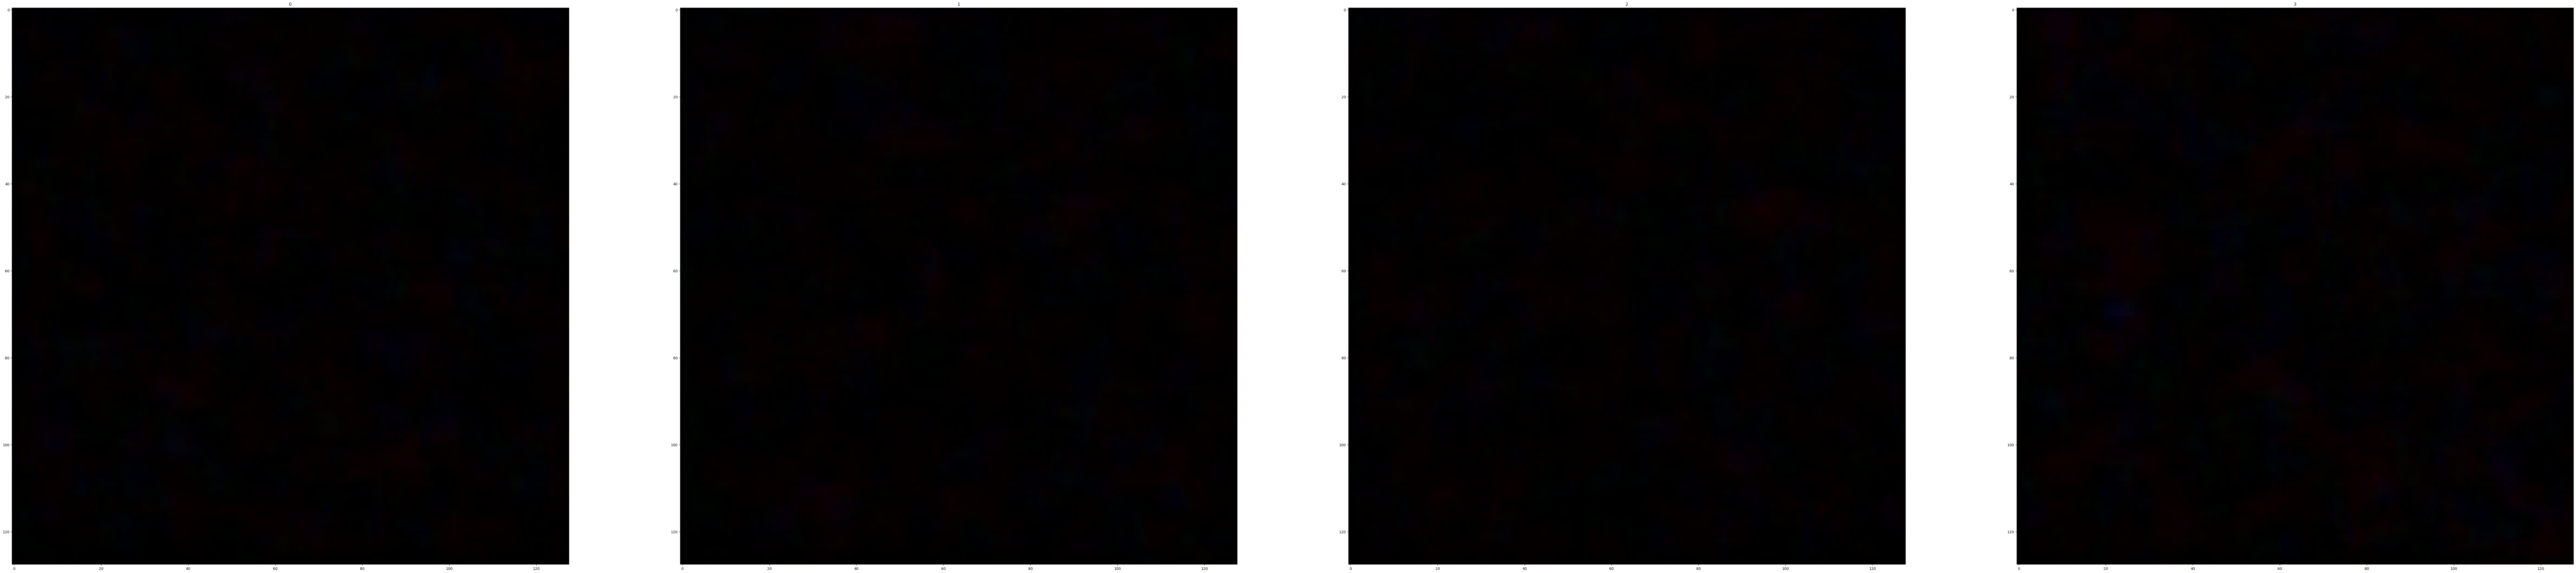

In [237]:
from matplotlib import pyplot as plt

img = generator.predict(np.random.randn(4,128,1))

fig, ax = plt.subplots(ncols=4, figsize=(128,128))

for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

# Discirminator

In [243]:
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras import Sequential

def build_discriminator(img_shape=(128, 128, 3)):
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(64, 5, input_shape=img_shape, padding='same'))  
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    # Second Conv Block
    model.add(Conv2D(128, 5, strides=2, padding='same'))  
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    # Third Conv Block
    model.add(Conv2D(256, 5, strides=2, padding='same'))  
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    # Fourth Conv Block
    model.add(Conv2D(512, 5, strides=2, padding='same'))  
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    # Fifth Conv Block
    model.add(Conv2D(1024, 5, strides=2, padding='same'))  
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    # Batch Normalization
    model.add(BatchNormalization())
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.3))
    
    # Dense layer
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# Example usage:
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy')

print("ok")

ok


In [244]:
import cv2
import numpy as np

# Load and preprocess the image
img = cv2.imread(r'C:\Users\tazpitarte\Desktop\Standardized images GAN scrap - Copie\0_1493321131-1429154843-beam-handstand-spllit-hold__91900__31732.1616511707(1).jpg')
img = np.expand_dims(img, axis=0)  # Add batch dimension


# Check the new shape
print(img.shape)


# Now, you can use the discriminator for prediction
result = discriminator.predict(img)
print(result)


(1, 128, 128, 3)
1/1 [==============================] - 0s 111ms/step
[[0.99365395]]


# Training loop

In [245]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import Sequential


latent_dim = 128
generator = build_generator(latent_dim)
generator.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [246]:
from tensorflow.keras.models import Model

class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        real_images = batch
        batch_size = tf.shape(real_images)[0]

        # Generate random noise for the generator
        noise = tf.random.normal((batch_size, latent_dim))

        # Generate fake images
        with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
            gen_images = self.generator(noise, training=True)

            # Train the discriminator
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(gen_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            y_realfake = tf.concat([
                tf.random.uniform(tf.shape(yhat_real), minval=0.9, maxval=1.0),
                tf.random.uniform(tf.shape(yhat_fake), minval=0.0, maxval=0.1)
            ], axis=0)

            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

            # Apply backpropagation with gradient clipping
            dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
            dgrad = [tf.clip_by_value(grad, -0.5, 0.5) for grad in dgrad]
            self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            fake_images = self.generator(noise, training=True)
            predicted_labels = self.discriminator(fake_images, training=False)
            total_g_loss = self.g_loss(tf.ones_like(predicted_labels), predicted_labels)

        # Apply backpropagation with gradient clipping
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        ggrad = [tf.clip_by_value(grad, -0.5, 0.5) for grad in ggrad]
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

print("ok")

ok


In [247]:
fashgan = FashionGAN(generator, discriminator)
print("ok")

ok


In [248]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)
print("ok")

ok


# Build callback

In [249]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
from sklearn.cluster import KMeans

class EnhancedModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def generate_and_save_images(self, epoch, latent_vectors):
        generated_images = self.model.generator(latent_vectors)
        generated_images *= 255
        generated_images = tf.image.resize(generated_images, (128, 128))
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join(r'C:\Users\tazpitarte\Desktop\saved training images', f'generated_img_{epoch}_{i}.png'))

    def on_epoch_end(self, epoch, logs=None):
        # Save images from random latent vectors
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        self.generate_and_save_images(epoch, random_latent_vectors)

        # Save images from clustered latent vectors
        # (Example using KMeans clustering, adjust as needed)
        all_latent_vectors = tf.random.uniform((1000, self.latent_dim, 1))
        kmeans = KMeans(n_clusters=self.num_img, random_state=42)
        kmeans.fit(all_latent_vectors.numpy().reshape(-1, self.latent_dim))
        cluster_centers = kmeans.cluster_centers_
        self.generate_and_save_images(epoch, cluster_centers.reshape(-1, self.latent_dim, 1))

        # Save images at different stages of the epoch
        for i in range(5):
            partial_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
            self.generate_and_save_images(epoch + i * 0.2, partial_latent_vectors)

print("ok")

ok


# Train

In [ ]:
hist = fashgan.fit(ds, epochs=50, callbacks=[ModelMonitor()])

Epoch 1/50
50/50 [==============================] - 2244s 45s/step - d_loss: 0.9004 - g_loss: 0.6790
Epoch 2/50
50/50 [==============================] - 2227s 45s/step - d_loss: 1.0670 - g_loss: 0.7060
Epoch 3/50
50/50 [==============================] - 2221s 44s/step - d_loss: 1.2199 - g_loss: 0.5930
Epoch 4/50
50/50 [==============================] - 2216s 44s/step - d_loss: 0.9752 - g_loss: 0.7674
Epoch 5/50
50/50 [==============================] - 2217s 44s/step - d_loss: 0.8262 - g_loss: 0.9227
Epoch 6/50
50/50 [==============================] - 2216s 44s/step - d_loss: 0.8536 - g_loss: 0.9163
Epoch 7/50
50/50 [==============================] - 2203s 44s/step - d_loss: 0.4903 - g_loss: 1.0637
Epoch 8/50
50/50 [==============================] - 2207s 44s/step - d_loss: 0.5946 - g_loss: 0.7484
Epoch 9/50
50/50 [==============================] - 2203s 44s/step - d_loss: 0.2066 - g_loss: 0.4733
Epoch 10/50
50/50 [==============================] - 2213s 44s/step - d_loss: -0.1099 - g_l

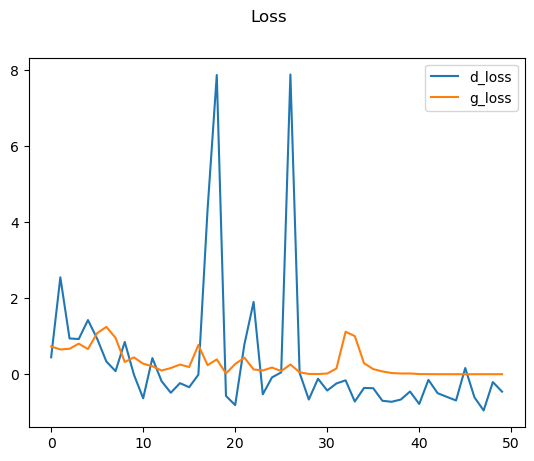

In [255]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# Test

In [256]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 487ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

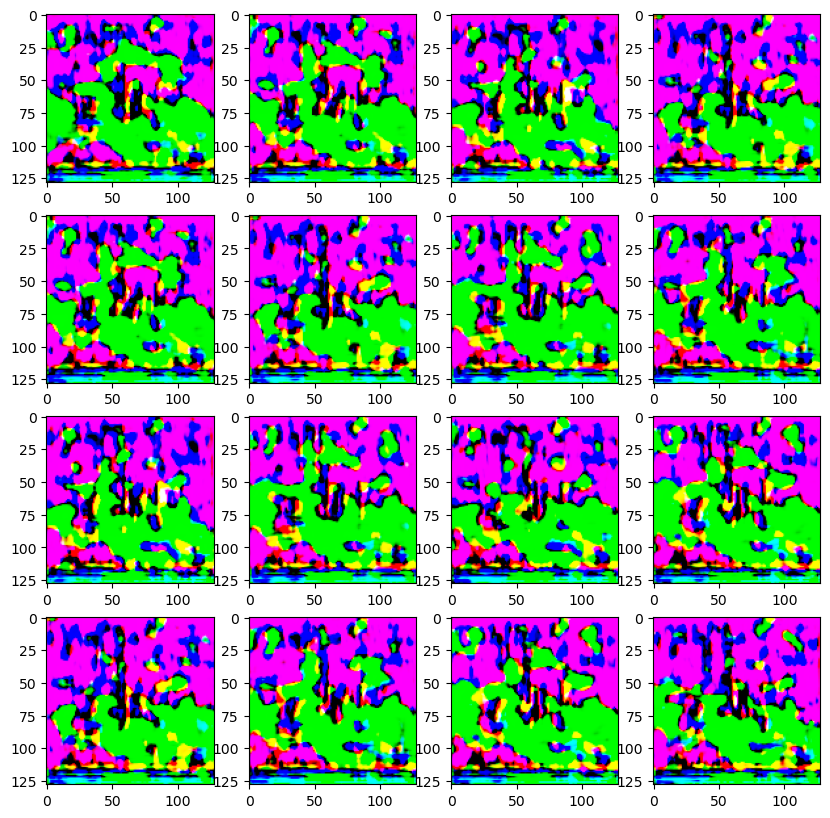

In [257]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

# Save the model

In [264]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')